In [1]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
!pip install tensorboard

Looking in indexes: https://download.pytorch.org/whl/cu118
     ---------------------------------------- 2.7/2.7 GB 844.0 kB/s eta 0:00:00
     ---------------------------------------- 5.0/5.0 MB 45.8 MB/s eta 0:00:00
     ---------------------------------------- 3.9/3.9 MB 50.2 MB/s eta 0:00:00
     ---------------------------------------- 5.7/5.7 MB 28.2 MB/s eta 0:00:00
     ---------------------------------------- 2.0/2.0 MB 5.9 MB/s eta 0:00:00
     -------------------------------------- 154.0/154.0 kB 9.0 MB/s eta 0:00:00
     --------------------------------------- 14.8/14.8 MB 34.4 MB/s eta 0:00:00
     ---------------------------------------- 2.5/2.5 MB 31.1 MB/s eta 0:00:00
     ------------------------------------- 536.2/536.2 kB 17.0 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 5.5/5.5 MB 22.1 MB/s eta 0:00:00
  Using cached absl_py-2.0.0-py3-none-any.whl (130 kB)
  Using cached grpcio-1.59.2-cp311-cp311-win_amd64.whl (3.7 MB)
  Using cached google_auth-2.23.4-py2.py3-none-any.whl (183 kB)
  Using cached google_auth_oauthlib-1.1.0-py2.py3-none-any.whl (19 kB)
  Using cached Markdown-3.5.1-py3-none-any.whl (102 kB)
  Using cached protobuf-4.23.4-cp310-abi3-win_amd64.whl (422 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl (2.4 kB)
  Using cached werkzeug-3.0.1-py3-none-any.whl (226 kB)
  Using cached cachetools-5.3.2-py3-none-any.whl (9.3 kB)
  Using cached pyasn1_modules-0.3.0-py2.py3-none-any.whl (181 kB)
  Using cached rsa-4.9-py3-none-any.whl (34 kB)
  Using cached requests_oauthlib-1.3.1-py2.py3-none-any.whl (23 kB)
  Using cached pyasn1-0.5.0-py2.py3-none-any.whl (83 kB)
  Using cached oauthlib-3.2.2-py3-none-any.whl (151 kB)



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
!pip install torchvision

In [2]:
# Import
import pickle
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn
from torch import optim
from torch.nn import functional as F
from torch.utils.data import random_split, DataLoader
from torchvision.datasets import CIFAR10
import torchvision
from torchvision import transforms

import tensorboard
from torch.utils.tensorboard import SummaryWriter

In [3]:
# Define the transform parameter
transform_googleNet = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
 ])

transform_resNet = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
 ])

transform_AlexNet = transforms.Compose([
    transforms.Resize((227 , 227)), 
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
 ])


def prepare_data():
  trainingSet_googleNet = CIFAR10("./",train = True, download=True, transform=transform_googleNet)
  trainingSet_resNet = CIFAR10("./",train = True, download=True, transform=transform_resNet)
  trainingSet_AlexNet = CIFAR10("./",train = True, download=True, transform=transform_AlexNet)
  testingSet = CIFAR10("./",train = False, download=True)


# Dataset instance
def trainSetup_googleNetAndresNet():
    cifarSet_googleNet = CIFAR10("./", train=True, transform = transform_googleNet)
    cifarTrain, cifarVal = random_split(cifarSet_googleNet,[40000,10000])

    return cifarTrain, cifarVal


def trainSetup_AlexNet():
    cifarSet_AlexNet = CIFAR10("./", train=True, transform = transform_AlexNet)
    cifarTrain, cifarVal = random_split(cifarSet_AlexNet,[40000,10000])

    return cifarTrain, cifarVal
def testSetup_googleNetAndresNet():

    cifarTest = CIFAR10("./", train=False, transform = transform_googleNet)
    return cifarTest

def testSetup_AlexNet():

    cifarTest = CIFAR10("./", train=False, transform = transform_AlexNet)
    return cifarTest
# Define the dataloader
def train_dataloader(cifarTrain):
        return DataLoader(dataset=cifarTrain, batch_size=64, shuffle=True)

def val_dataloader(cifarVal):
        return DataLoader(dataset=cifarVal, batch_size=64)

def test_dataloader(cifarTest):
        return DataLoader(dataset=cifarTest, batch_size=64, shuffle=False)

In [4]:
import matplotlib.pyplot as plt

# Define the parameters of reading dataset
batch_size = 10
num_classes = 10
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
'dog', 'frog', 'horse', 'ship', 'truck']

def showimg(img):
  img = img/2 + 0.5
  npimg = img.numpy() # transfer to numpy array
  plt.imshow(np.transpose(npimg, (1, 2, 0))) # transfer dimension and show up
  plt.show()



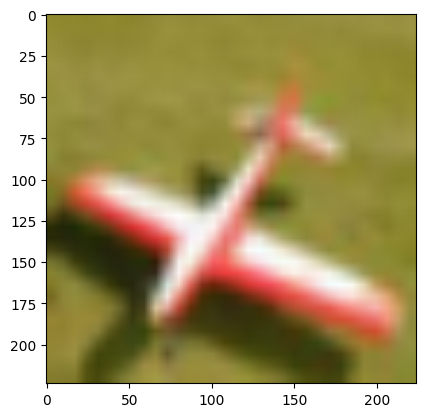

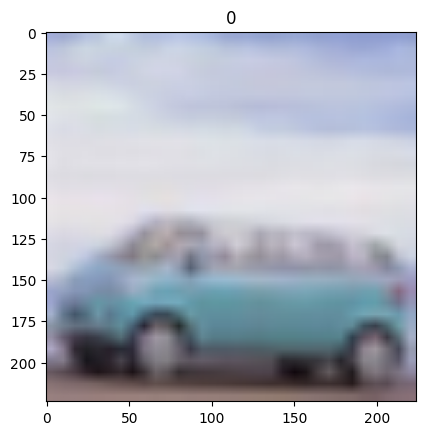

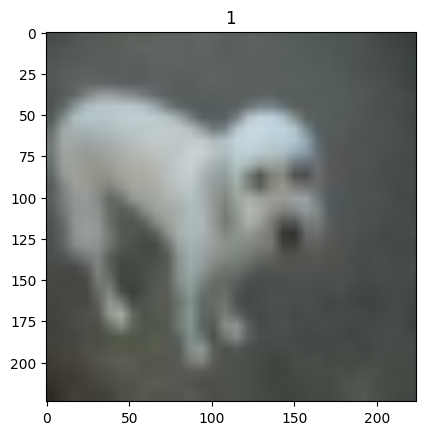

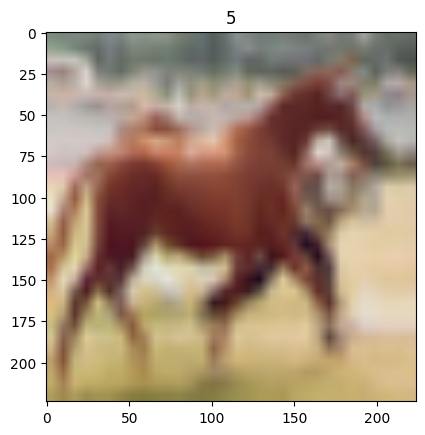

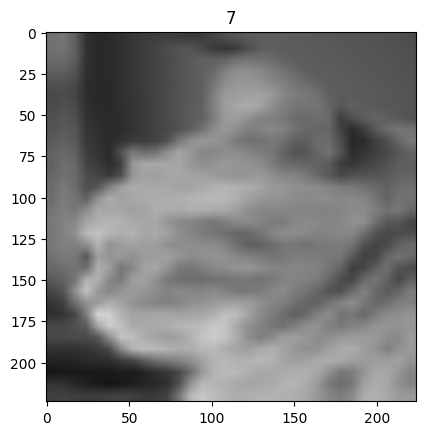

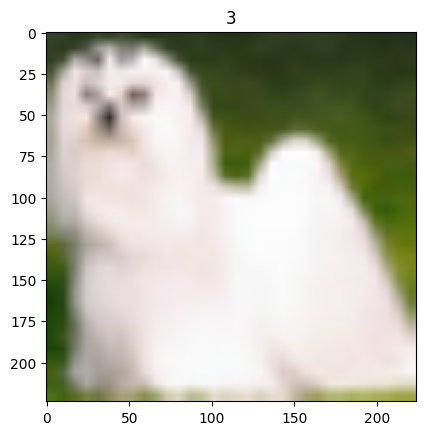

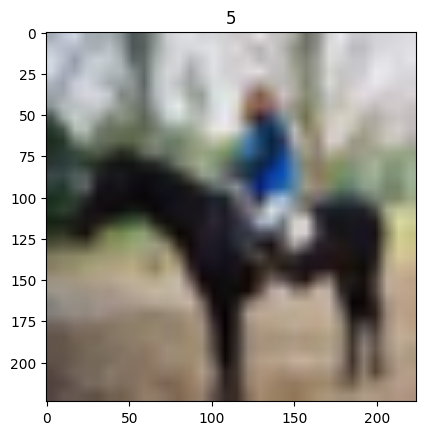

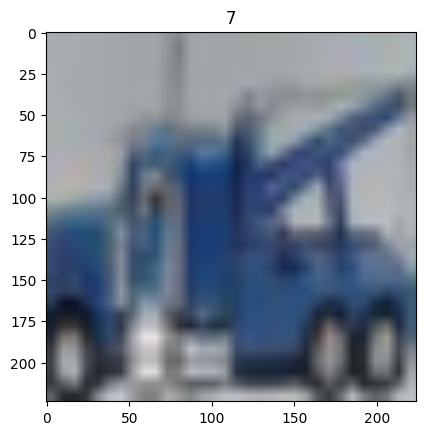

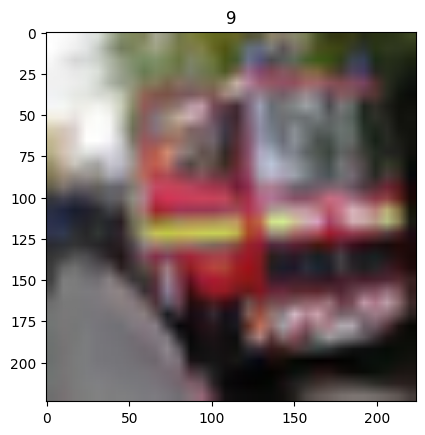

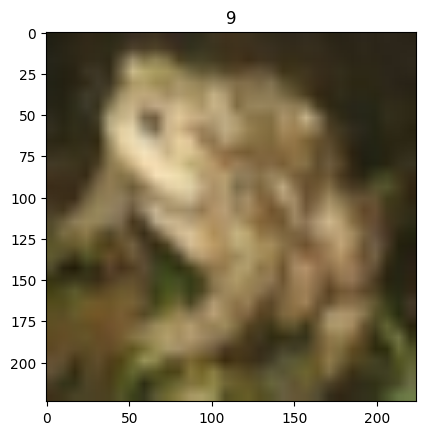

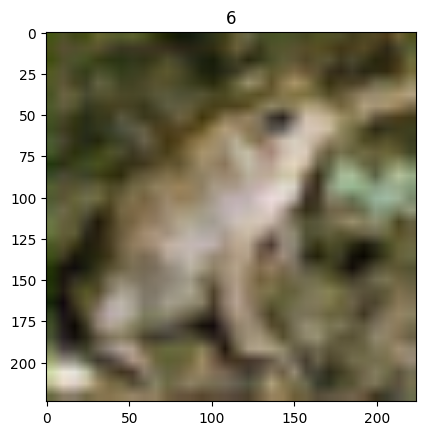

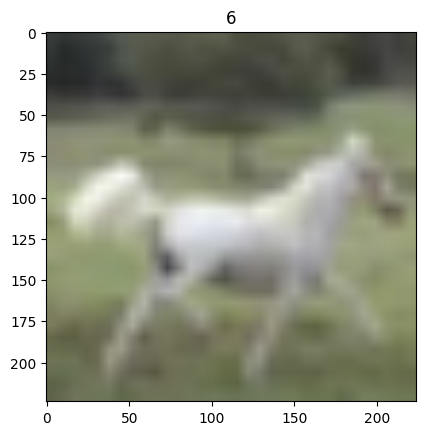

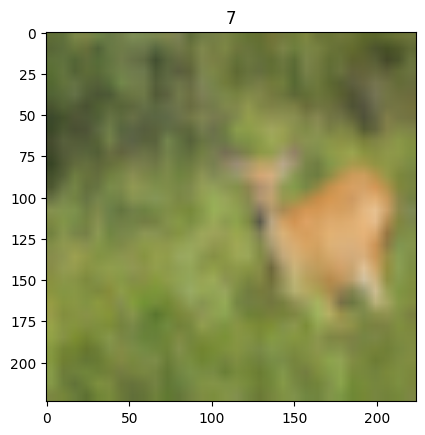

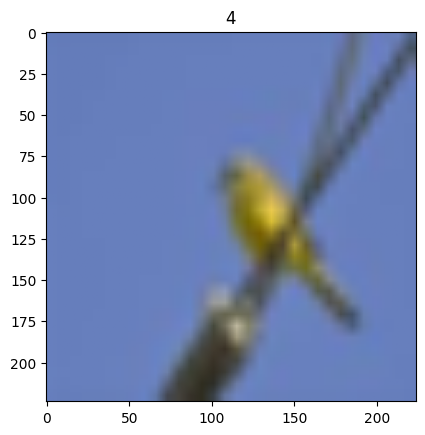

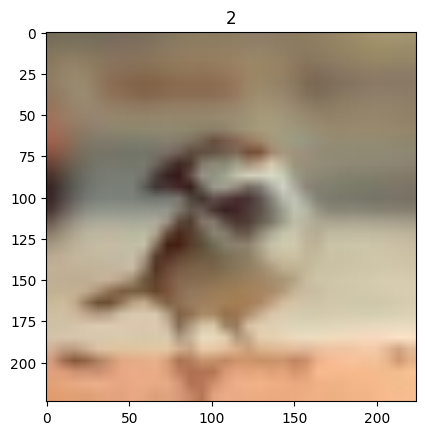

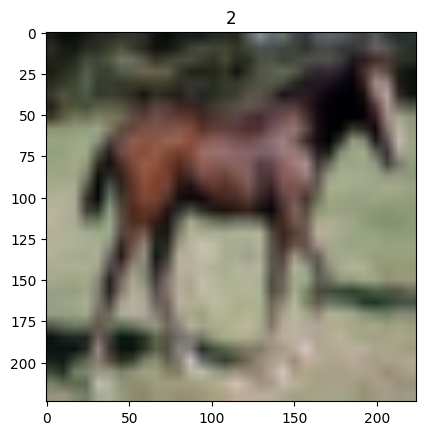

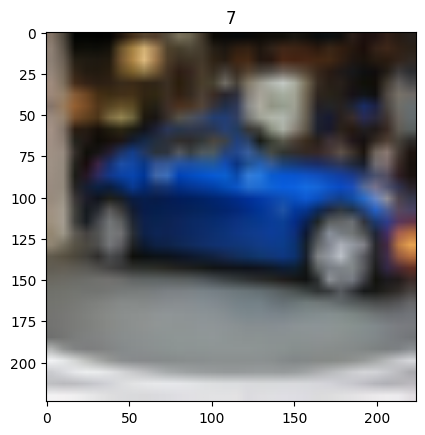

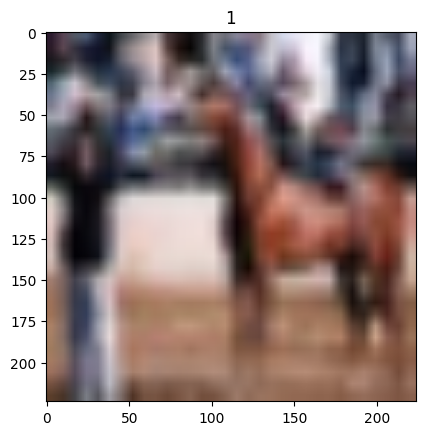

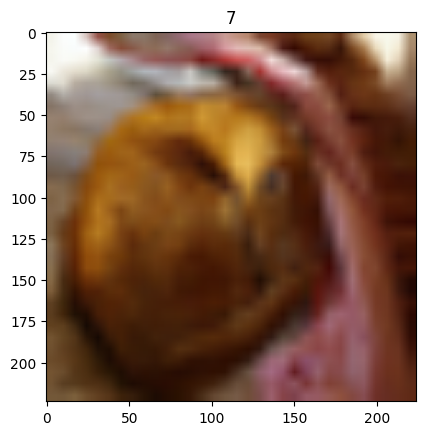

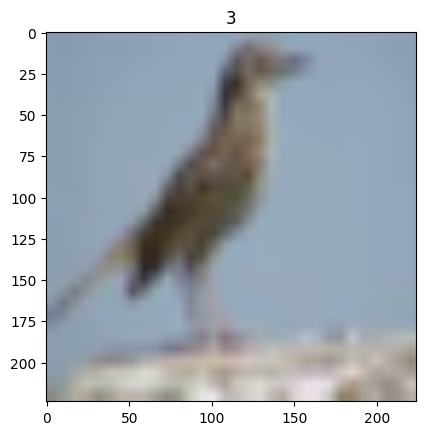

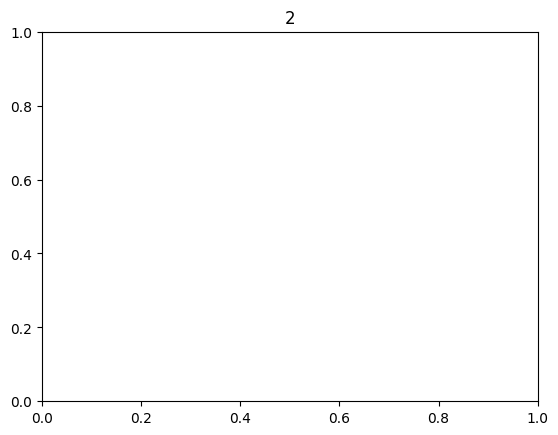

In [5]:
# Reading dataset

cifarTrain_set_googleNetAndresNet, cifarValid_set_googleNetAndresNet = trainSetup_googleNetAndresNet()
cifarTrain_set_AlexNet, cifarValid_set_AlexNet = trainSetup_AlexNet()
cifarTest_set_googleNetAndresNet = testSetup_googleNetAndresNet()
cifarTest_set_AlexNet = testSetup_AlexNet()

# Visualization of image data
dataiter_AlexNet = iter(cifarTrain_set_googleNetAndresNet)
tempCounter = 0
for item in dataiter_AlexNet:
 if tempCounter == 20:
  break
 images, labels = next(dataiter_AlexNet)
 showimg(torchvision.utils.make_grid(images))
 plt.title(labels)
 tempCounter += 1

#loading dataloader
trainloader_googleNet = train_dataloader(cifarTrain_set_googleNetAndresNet)
trainloader_resNet = train_dataloader(cifarTrain_set_googleNetAndresNet)
trainloader_AlexNet = train_dataloader(cifarTrain_set_AlexNet)
validationloader_googleNet = val_dataloader(cifarValid_set_googleNetAndresNet)
validationloader_resNet = val_dataloader(cifarValid_set_googleNetAndresNet)
validationloader_AlexNet = val_dataloader(cifarValid_set_AlexNet)
testloader_googleNet = test_dataloader(cifarTest_set_googleNetAndresNet)
testloader_resNet = test_dataloader(cifarTest_set_googleNetAndresNet)
testloader_AlexNet = test_dataloader(cifarTest_set_AlexNet)

In [6]:
# Import the pretrained model to do the image classification
from torchvision import models

googleNet = models.googlenet(pretrained = True)
alexNet = models.alexnet(pretrained = True)
resNet = models.resnet50(pretrained = True)

# Modify the last layer for adapting the CIFAR10's 10 categories
num_features_googlenet = googleNet.fc.in_features
num_features = alexNet.classifier[6].in_features
num_features_resnet = resNet.fc.in_features
googleNet.fc = nn.Linear(num_features_googlenet,10)
alexNet.classifier[6] = torch.nn.Linear(num_features, 10)
resNet.fc = nn.Linear(num_features_resnet,10)


print(googleNet.fc)
print(alexNet.classifier[6])
print(resNet.fc)

E:\NeuralNetwork\Deep Learning\Project\venv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
E:\NeuralNetwork\Deep Learning\Project\venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=GoogLeNet_Weights.IMAGENET1K_V1`. You can also use `weights=GoogLeNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
E:\NeuralNetwork\Deep Learning\Project\venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use

Linear(in_features=1024, out_features=10, bias=True)
Linear(in_features=4096, out_features=10, bias=True)
Linear(in_features=2048, out_features=10, bias=True)


In [7]:
# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer_googleNet = optim.Adam(googleNet.parameters(), lr= 0.001)
optimizer_resNet = optim.Adam(resNet.parameters(), lr= 0.001)
optimizer_AlexNet = optim.Adam(alexNet.parameters(), lr= 0.001)

In [8]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [9]:
googleNet.to(device)

log_dir = "./logs/googleNet"
writer = SummaryWriter(log_dir)

for epoch in range(40):
  running_loss = 0.0
  for i, data in enumerate(trainloader_googleNet, 0):
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)

    optimizer_googleNet.zero_grad()

    outputs = googleNet(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer_googleNet.step()

    running_loss = loss.item()
    if i%100 == 99:
      average_loss = running_loss / 100
      print(f"Epoch {epoch+1}, Batch {i+1}, Loss: {average_loss:.3f}")

      global_step = epoch * len(trainloader_googleNet) + i
      writer.add_scalar("Loss", average_loss, global_step)

      running_loss = 0.0

print("googleNet Training finished")


Epoch 1, Batch 100, Loss: 0.005
Epoch 1, Batch 200, Loss: 0.005
Epoch 1, Batch 300, Loss: 0.003
Epoch 1, Batch 400, Loss: 0.007
Epoch 1, Batch 500, Loss: 0.004
Epoch 1, Batch 600, Loss: 0.004
Epoch 2, Batch 100, Loss: 0.002
Epoch 2, Batch 200, Loss: 0.004
Epoch 2, Batch 300, Loss: 0.004
Epoch 2, Batch 400, Loss: 0.004
Epoch 2, Batch 500, Loss: 0.004
Epoch 2, Batch 600, Loss: 0.004
Epoch 3, Batch 100, Loss: 0.002
Epoch 3, Batch 200, Loss: 0.003
Epoch 3, Batch 300, Loss: 0.004
Epoch 3, Batch 400, Loss: 0.003
Epoch 3, Batch 500, Loss: 0.003
Epoch 3, Batch 600, Loss: 0.002
Epoch 4, Batch 100, Loss: 0.001
Epoch 4, Batch 200, Loss: 0.001
Epoch 4, Batch 300, Loss: 0.002
Epoch 4, Batch 400, Loss: 0.002
Epoch 4, Batch 500, Loss: 0.003
Epoch 4, Batch 600, Loss: 0.001
Epoch 5, Batch 100, Loss: 0.001
Epoch 5, Batch 200, Loss: 0.001
Epoch 5, Batch 300, Loss: 0.002
Epoch 5, Batch 400, Loss: 0.004
Epoch 5, Batch 500, Loss: 0.002
Epoch 5, Batch 600, Loss: 0.001
Epoch 6, Batch 100, Loss: 0.002
Epoch 6,

In [10]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
alexNet.to(device)

log_dir = "./logs/AlexNet"
writer = SummaryWriter(log_dir)

for epoch in range(40):
  running_loss = 0.0
  for i, data in enumerate(trainloader_AlexNet, 0):
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)

    optimizer_AlexNet.zero_grad()

    outputs = alexNet(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer_AlexNet.step()

    running_loss = loss.item()
    if i%100 == 99:
      average_loss = running_loss / 100
      print(f"Epoch {epoch+1}, Batch {i+1}, Loss: {average_loss:.3f}")

      global_step = epoch * len(trainloader_AlexNet) + i
      writer.add_scalar("Loss", average_loss, global_step)

      running_loss = 0.0

print("alexNet Training finished")

Epoch 1, Batch 100, Loss: 0.021
Epoch 1, Batch 200, Loss: 0.021
Epoch 1, Batch 300, Loss: 0.016
Epoch 1, Batch 400, Loss: 0.014
Epoch 1, Batch 500, Loss: 0.014
Epoch 1, Batch 600, Loss: 0.014
Epoch 2, Batch 100, Loss: 0.012
Epoch 2, Batch 200, Loss: 0.014
Epoch 2, Batch 300, Loss: 0.013
Epoch 2, Batch 400, Loss: 0.012
Epoch 2, Batch 500, Loss: 0.014
Epoch 2, Batch 600, Loss: 0.011
Epoch 3, Batch 100, Loss: 0.007
Epoch 3, Batch 200, Loss: 0.009
Epoch 3, Batch 300, Loss: 0.010
Epoch 3, Batch 400, Loss: 0.009
Epoch 3, Batch 500, Loss: 0.008
Epoch 3, Batch 600, Loss: 0.011
Epoch 4, Batch 100, Loss: 0.009
Epoch 4, Batch 200, Loss: 0.008
Epoch 4, Batch 300, Loss: 0.011
Epoch 4, Batch 400, Loss: 0.009
Epoch 4, Batch 500, Loss: 0.009
Epoch 4, Batch 600, Loss: 0.009
Epoch 5, Batch 100, Loss: 0.008
Epoch 5, Batch 200, Loss: 0.008
Epoch 5, Batch 300, Loss: 0.005
Epoch 5, Batch 400, Loss: 0.005
Epoch 5, Batch 500, Loss: 0.010
Epoch 5, Batch 600, Loss: 0.008
Epoch 6, Batch 100, Loss: 0.006
Epoch 6,

In [11]:
resNet.to(device)

log_dir = "./logs/resNet"
writer = SummaryWriter(log_dir)

for epoch in range(40):
  running_loss = 0.0
  for i, data in enumerate(trainloader_resNet, 0):
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)

    optimizer_resNet.zero_grad()

    outputs = resNet(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer_resNet.step()

    running_loss = loss.item()
    if i%100 == 99:
      average_loss = running_loss / 100
      print(f"Epoch {epoch+1}, Batch {i+1}, Loss: {average_loss:.3f}")
      
      global_step = epoch * len(trainloader_resNet) + i
      writer.add_scalar("Loss", average_loss, global_step)

      running_loss = 0.0

print("resNet Training finished")

Epoch 1, Batch 100, Loss: 0.011
Epoch 1, Batch 200, Loss: 0.009
Epoch 1, Batch 300, Loss: 0.009
Epoch 1, Batch 400, Loss: 0.006
Epoch 1, Batch 500, Loss: 0.009
Epoch 1, Batch 600, Loss: 0.006
Epoch 2, Batch 100, Loss: 0.005
Epoch 2, Batch 200, Loss: 0.005
Epoch 2, Batch 300, Loss: 0.005
Epoch 2, Batch 400, Loss: 0.004
Epoch 2, Batch 500, Loss: 0.003
Epoch 2, Batch 600, Loss: 0.004
Epoch 3, Batch 100, Loss: 0.004
Epoch 3, Batch 200, Loss: 0.004
Epoch 3, Batch 300, Loss: 0.003
Epoch 3, Batch 400, Loss: 0.004
Epoch 3, Batch 500, Loss: 0.002
Epoch 3, Batch 600, Loss: 0.006
Epoch 4, Batch 100, Loss: 0.004
Epoch 4, Batch 200, Loss: 0.004
Epoch 4, Batch 300, Loss: 0.003
Epoch 4, Batch 400, Loss: 0.002
Epoch 4, Batch 500, Loss: 0.003
Epoch 4, Batch 600, Loss: 0.003
Epoch 5, Batch 100, Loss: 0.002
Epoch 5, Batch 200, Loss: 0.003
Epoch 5, Batch 300, Loss: 0.002
Epoch 5, Batch 400, Loss: 0.002
Epoch 5, Batch 500, Loss: 0.003
Epoch 5, Batch 600, Loss: 0.002
Epoch 6, Batch 100, Loss: 0.002
Epoch 6,

In [12]:
#Evalute the performance of model of googleNet
correct = 0
total = 0
with torch.no_grad():
  for data in testloader_googleNet:
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    outputs = googleNet(inputs)
    _,predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

accuracy = 100*(correct/total)
print(f"GoogleNet's Accuracy on the test set:{accuracy:.2f}%")

GoogleNet's Accuracy on the test set:91.55%


In [13]:
#Evalute the performance of model of alexNet
correct = 0
total = 0
with torch.no_grad():
  for data in testloader_AlexNet:
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    outputs = alexNet(inputs)
    _,predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

accuracy = 100*(correct/total)
print(f"alexNet's Accuracy on the test set:{accuracy:.2f}%")

alexNet's Accuracy on the test set:75.14%


In [14]:
#Evalute the performance of model of resNet
correct = 0
total = 0
with torch.no_grad():
  for data in testloader_resNet:
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    outputs = resNet(inputs)
    _,predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

accuracy = 100*(correct/total)
print(f"resNet's Accuracy on the test set:{accuracy:.2f}%")

resNet's Accuracy on the test set:88.06%


In [15]:
%load_ext tensorboard
%tensorboard --logdir ./logs --port=8888



Launching TensorBoard...

In [16]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# Loading the dataset

googleNet.eval()
googleNet.cpu()

# prepare the dataset and inference the prediction

with torch.no_grad():
  for data in testloader_googleNet:
    inputs, labels = data
    inputs, labels = inputs.cpu(), labels.cpu()
    outputs = googleNet(inputs)

  predicted_labels = outputs.argmax(dim=1)
  true_labels = labels
  f1 = f1_score(true_labels, predicted_labels, average='macro', zero_division=1)  # 可根据需要选择不同的average参数
  confusion_matrix_result = confusion_matrix(true_labels, predicted_labels)
  precision = precision_score(true_labels, predicted_labels, average='macro', zero_division=1)
  recall = recall_score(true_labels, predicted_labels, average='macro', zero_division=1)

print("The result of googleNet:")
print(f"F1 Score: {f1}")
print(f"Precision Score: {precision}")
print(f"Recall Score: {recall}")
print("Confusion Matrix:")
print(confusion_matrix_result)

The result of googleNet:
F1 Score: 0.7071428571428571
Precision Score: 0.84375
Recall Score: 0.8333333333333333
Confusion Matrix:
[[2 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 3 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 1 0 2 0 0]
 [0 0 0 0 0 0 3 0]
 [0 0 0 0 0 0 0 3]]


In [17]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

alexNet.eval()
alexNet.cpu()

# prepare the dataset and inference the prediction

with torch.no_grad():
  for data in testloader_AlexNet:
    inputs, labels = data
    inputs, labels = inputs.cpu(), labels.cpu()
    outputs = alexNet(inputs)

  predicted_labels = outputs.argmax(dim=1)
  true_labels = labels
  f1 = f1_score(true_labels, predicted_labels, average='macro', zero_division=1)  # 可根据需要选择不同的average参数
  confusion_matrix_result = confusion_matrix(true_labels, predicted_labels)
  precision = precision_score(true_labels, predicted_labels, average='macro', zero_division=1)
  recall = recall_score(true_labels, predicted_labels, average='macro', zero_division=1)

print("The result of alexNet:")
print(f"F1 Score: {f1}")
print(f"Precision Score: {precision}")
print(f"Recall Score: {recall}")
print("Confusion Matrix:")
print(confusion_matrix_result)

The result of alexNet:
F1 Score: 0.6063492063492064
Precision Score: 0.75
Recall Score: 0.8148148148148148
Confusion Matrix:
[[2 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0]
 [0 0 0 3 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 2 0 0 1]
 [0 0 0 0 0 0 3 0 0]
 [0 0 0 1 0 0 0 2 0]
 [0 0 0 0 0 0 0 0 0]]


In [18]:
resNet.eval()
resNet.cpu()

# prepare the dataset and inference the prediction

with torch.no_grad():
  for data in testloader_resNet:
    inputs, labels = data
    inputs, labels = inputs.cpu(), labels.cpu()
    outputs = resNet(inputs)

  predicted_labels = outputs.argmax(dim=1)
  true_labels = labels
  f1 = f1_score(true_labels, predicted_labels, average='macro', zero_division=1)  # 可根据需要选择不同的average参数
  confusion_matrix_result = confusion_matrix(true_labels, predicted_labels)
  precision = precision_score(true_labels, predicted_labels, average='macro', zero_division=1)
  recall = recall_score(true_labels, predicted_labels, average='macro', zero_division=1)

print("The result of resNet:")
print(f"F1 Score: {f1}")
print(f"Precision Score: {precision}")
print(f"Recall Score: {recall}")
print("Confusion Matrix:")
print(confusion_matrix_result)

The result of resNet:
F1 Score: 0.75
Precision Score: 0.875
Recall Score: 0.875
Confusion Matrix:
[[2 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 3 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 3 0 0]
 [0 0 0 0 0 0 3 0]
 [0 0 0 0 0 0 0 3]]
